#### Python EDA Exercises

For these exercises, you will be conducting basic exploratory data analysis on IMDB's movie data, looking to answer such questions as:

Note that there may be several ways to approach each question. 

Write comments for all of your code describing any assumptions you made in order to solve these problems.

## Part I

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#### Read in 'imdb_1000.csv' and store it in a DataFrame named movies.

In [2]:
movies = pd.read_csv('./data/imdb_1000.csv')

#### Check the number of rows and columns.

In [3]:
# (number of rows, number of columns)
movies.shape

(979, 6)

#### Check the data type of each column.

In [4]:
movies.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

#### Calculate the average movie duration.

In [5]:
movies.duration.mean()

120.97957099080695

#### Sort the DataFrame by duration to find the shortest and longest movies.

In [6]:
# Shortest movie: Freaks
# Longest movie: Hamlet
movies.sort_values(by=['duration'])

,star_rating,title,content_rating,genre,duration,actors_list
389,8.0,Freaks,UNRATED,Drama,64,"[u'Wallace Ford', u'Leila Hyams', u'Olga Bacla..."
338,8.0,Battleship Potemkin,UNRATED,History,66,"[u'Aleksandr Antonov', u'Vladimir Barsky', u'G..."
258,8.1,The Cabinet of Dr. Caligari,UNRATED,Crime,67,"[u'Werner Krauss', u'Conrad Veidt', u'Friedric..."
293,8.1,Duck Soup,PASSED,Comedy,68,"[u'Groucho Marx', u'Harpo Marx', u'Chico Marx']"
88,8.4,The Kid,NOT RATED,Comedy,68,"[u'Charles Chaplin', u'Edna Purviance', u'Jack..."
...,...,...,...,...,...,...
445,7.9,The Ten Commandments,APPROVED,Adventure,220,"[u'Charlton Heston', u'Yul Brynner', u'Anne Ba..."
142,8.3,Lagaan: Once Upon a Time in India,PG,Adventure,224,"[u'Aamir Khan', u'Gracy Singh', u'Rachel Shell..."
78,8.4,Once Upon a Time in America,R,Crime,229,"[u'Robert De Niro', u'James Woods', u'Elizabet..."
157,8.2,Gone with the Wind,G,Drama,238,"[u'Clark Gable', u'Vivien Leigh', u'Thomas Mit..."


#### Create a histogram of duration, choosing an "appropriate" number of bins.

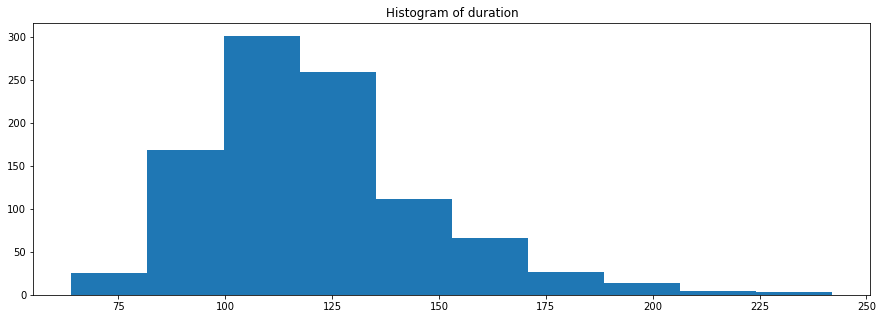

In [7]:
# Right skewed histogram
# Most of the movies have duration from range 100 to 120
plt.figure(figsize=(15,5))
plt.hist(movies.duration, bins=10)
plt.title('Histogram of duration');

## Part II

#### Count how many movies have each of the content ratings.

In [8]:
movies.content_rating.value_counts()

R            460
PG-13        189
PG           123
NOT RATED     65
APPROVED      47
UNRATED       38
G             32
PASSED         7
NC-17          7
X              4
GP             3
TV-MA          1
Name: content_rating, dtype: int64

#### Use a visualization to display that same data, including a title and x and y labels.

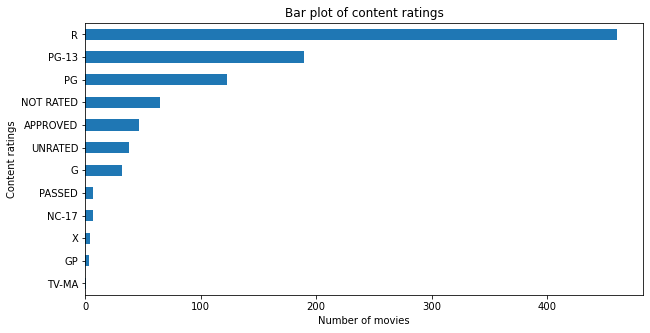

In [9]:
# Movies mostly consisted of R rated movies, followed by PG-13
fig, ax = plt.subplots(figsize=(10,5))
movies.groupby('content_rating').title.count().sort_values().plot.barh(title='Bar plot of content ratings')
ax.set_ylabel('Content ratings')
ax.set_xlabel('Number of movies');

#### Convert the following content ratings to "UNRATED": NOT RATED, APPROVED, PASSED, GP.

In [10]:
movies.content_rating.replace({'NOT RATED': 'UNRATED', 
                               'APPROVED': 'UNRATED', 
                               'PASSED': 'UNRATED', 
                               'GP': 'UNRATED'}, inplace=True)

In [11]:
# No more not rated, approved, passed and GP movies
movies.content_rating.value_counts()

R          460
PG-13      189
UNRATED    160
PG         123
G           32
NC-17        7
X            4
TV-MA        1
Name: content_rating, dtype: int64

#### Count the number of missing values in each column.

In [12]:
# 3 missing values in content_rating column
movies.isnull().sum()

star_rating       0
title             0
content_rating    3
genre             0
duration          0
actors_list       0
dtype: int64

#### If there are missing values: examine them, then fill them in with "reasonable" values.

In [13]:
# Rows with missing values
movies[movies.isnull().any(axis=1)]

,star_rating,title,content_rating,genre,duration,actors_list
187,8.2,Butch Cassidy and the Sundance Kid,NaN,Biography,110,"[u'Paul Newman', u'Robert Redford', u'Katharin..."
649,7.7,Where Eagles Dare,NaN,Action,158,"[u'Richard Burton', u'Clint Eastwood', u'Mary ..."
936,7.4,True Grit,NaN,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


In [14]:
# After searching on IMDb page, for Singapore, it gave the following information:
# (PG-13) https://www.imdb.com/title/tt0064115/parentalguide?ref_=tt_ov_pg
# (PG) https://www.imdb.com/title/tt0065207/parentalguide?ref_=tt_ov_pg
# (PG) https://www.imdb.com/title/tt0065126/parentalguide?ref_=tt_ov_pg

movies.loc[187, 'content_rating'] = 'PG-13'
movies['content_rating'] = movies['content_rating'].fillna('PG')

In [15]:
# No more missing values in dataset
movies.isnull().sum()

star_rating       0
title             0
content_rating    0
genre             0
duration          0
actors_list       0
dtype: int64

#### Calculate the average star rating for movies 2 hours or longer, and compare that with the average star rating for movies shorter than 2 hours.

In [16]:
# average star rating for movies 2 hours or longer
movies[movies.duration>=120].star_rating.mean()

7.948898678414082

In [17]:
# Average star rating for movies shorter than 2 hours
movies[movies.duration<120].star_rating.mean()

7.838666666666657

Average star rating for movies shorter than 2 hours is slightly lower than movies that are 2 hours or longer.

#### Use a visualization to detect whether there is a relationship between duration and star rating.

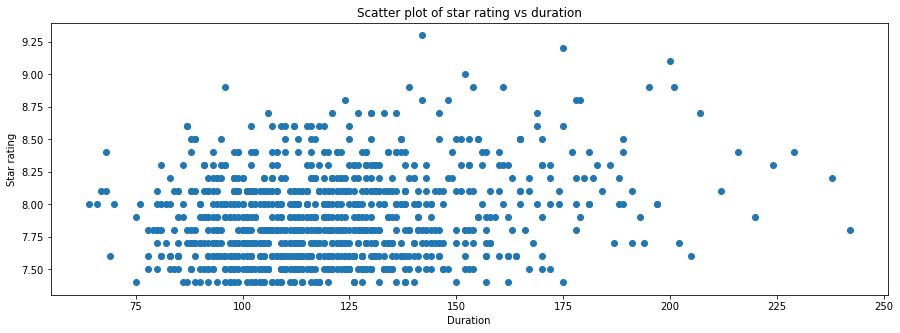

In [18]:
# There are no observable relationship between duration and star rating
plt.figure(figsize=(15,5))
plt.scatter(movies['duration'], movies['star_rating'])
plt.title('Scatter plot of star rating vs duration')
plt.xlabel('Duration')
plt.ylabel('Star rating');

#### Calculate the average duration for each genre.

In [19]:
movies.groupby('genre')[['duration']].mean().sort_values('duration')

,duration
genre,
History,66.000000
Animation,96.596774
Film-Noir,97.333333
Horror,102.517241
Family,107.500000
Comedy,107.602564
Sci-Fi,109.000000
Fantasy,112.000000
Thriller,114.200000


## Part III

#### Visualize the relationship between content rating and duration.

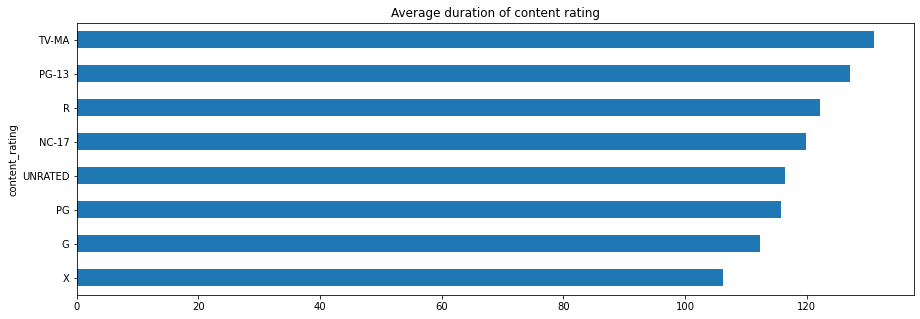

In [20]:
# TV-MA movies have the longest average duration
movies.groupby('content_rating')[['duration']].mean().sort_values(by='duration').plot.barh(legend=False, 
                                                                                           title='Average duration of content rating',
                                                                                           figsize=(15,5));

#### Determine the top rated movie (by star rating) for each genre.

In [22]:
# Top rated movies for each genre
movies.sort_values(by='star_rating', ascending=False).groupby('genre')[['title', 'star_rating']].first().sort_values('star_rating')

,title,star_rating
genre,,
Fantasy,The City of Lost Children,7.7
Family,E.T. the Extra-Terrestrial,7.9
History,Battleship Potemkin,8.0
Thriller,Shadow of a Doubt,8.0
Sci-Fi,Blade Runner,8.2
Film-Noir,The Third Man,8.3
Animation,Spirited Away,8.6
Comedy,Modern Times,8.6
Horror,Psycho,8.6


#### Check if there are multiple movies with the same title, and if so, determine if they are actually duplicates.

In [23]:
# They are not duplicates as the duration and actors in actors list are different
pd.set_option('display.max_colwidth', None)
duplicates = movies.duplicated(subset=['title'], keep=False)
movies[duplicates]

,star_rating,title,content_rating,genre,duration,actors_list
466,7.9,The Girl with the Dragon Tattoo,R,Crime,158,"[u'Daniel Craig', u'Rooney Mara', u'Christopher Plummer']"
482,7.8,The Girl with the Dragon Tattoo,R,Crime,152,"[u'Michael Nyqvist', u'Noomi Rapace', u'Ewa Fr\xf6ling']"
662,7.7,True Grit,PG-13,Adventure,110,"[u'Jeff Bridges', u'Matt Damon', u'Hailee Steinfeld']"
678,7.7,Les Miserables,PG-13,Drama,158,"[u'Hugh Jackman', u'Russell Crowe', u'Anne Hathaway']"
703,7.6,Dracula,UNRATED,Horror,85,"[u'Bela Lugosi', u'Helen Chandler', u'David Manners']"
905,7.5,Dracula,R,Horror,128,"[u'Gary Oldman', u'Winona Ryder', u'Anthony Hopkins']"
924,7.5,Les Miserables,PG-13,Crime,134,"[u'Liam Neeson', u'Geoffrey Rush', u'Uma Thurman']"
936,7.4,True Grit,PG,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


#### Calculate the average star rating for each genre, but only include genres with at least 10 movies


In [24]:
# Average star rating for each genre with at least 10 movies
df = movies.groupby('genre').agg({'title': 'count', 'star_rating': 'mean'}).sort_values(by='star_rating')
df[df['title'] > 10]

,title,star_rating
genre,,
Horror,29,7.806897
Comedy,156,7.822436
Biography,77,7.862338
Action,136,7.884559
Drama,278,7.902518
Animation,62,7.914516
Crime,124,7.916935
Adventure,75,7.933333
Mystery,16,7.975000


## Bonus

#### Figure out something "interesting" using the actors data!

We will find the number of movies each actor did and the average star ratings for each actor

In [25]:
# Remove other characters from actors list
movies['actors_list'] = movies['actors_list'].str.replace('[', '')
movies['actors_list'] = movies['actors_list'].str.replace(']', '')
movies['actors_list'] = movies['actors_list'].str.replace("u'", '')
movies['actors_list'] = movies['actors_list'].str.replace("'", '')
movies['actors_list'] = movies['actors_list'].str.replace('u"', '')
movies['actors_list'] = movies['actors_list'].str.replace('"', '')

<ipython-input-25-ccd68575f1f8>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  movies['actors_list'] = movies['actors_list'].str.replace('[', '')
<ipython-input-25-ccd68575f1f8>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  movies['actors_list'] = movies['actors_list'].str.replace(']', '')


In [26]:
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"Tim Robbins, Morgan Freeman, Bob Gunton"
1,9.2,The Godfather,R,Crime,175,"Marlon Brando, Al Pacino, James Caan"
2,9.1,The Godfather: Part II,R,Crime,200,"Al Pacino, Robert De Niro, Robert Duvall"
3,9.0,The Dark Knight,PG-13,Action,152,"Christian Bale, Heath Ledger, Aaron Eckhart"
4,8.9,Pulp Fiction,R,Crime,154,"John Travolta, Uma Thurman, Samuel L. Jackson"


In [27]:
# Extract out the names from actors list
df1 = pd.concat([movies, movies['actors_list'].str.split(', ', expand=True)], axis=1)

In [28]:
df1.head()

,star_rating,title,content_rating,genre,duration,actors_list,0,1,2
0,9.3,The Shawshank Redemption,R,Crime,142,"Tim Robbins, Morgan Freeman, Bob Gunton",Tim Robbins,Morgan Freeman,Bob Gunton
1,9.2,The Godfather,R,Crime,175,"Marlon Brando, Al Pacino, James Caan",Marlon Brando,Al Pacino,James Caan
2,9.1,The Godfather: Part II,R,Crime,200,"Al Pacino, Robert De Niro, Robert Duvall",Al Pacino,Robert De Niro,Robert Duvall
3,9.0,The Dark Knight,PG-13,Action,152,"Christian Bale, Heath Ledger, Aaron Eckhart",Christian Bale,Heath Ledger,Aaron Eckhart
4,8.9,Pulp Fiction,R,Crime,154,"John Travolta, Uma Thurman, Samuel L. Jackson",John Travolta,Uma Thurman,Samuel L. Jackson


In [29]:
# Create dataframe of unique actor names
names = list(set(list(df1[0].unique()) + list(df1[1].unique()) + list(df1[2].unique())))
actors_rating = pd.DataFrame(names, columns=['names'])

# Number of actors
len(names)

1777

In [30]:
# Merge star ratings and actor names, find the average star ratings for each actor
first = df1[['star_rating', 0]]
second = df1[['star_rating', 1]]
third = df1[['star_rating', 2]]

a = actors_rating.merge(first, left_on=['names'], right_on=[0])
a.drop(columns=0, inplace=True)

b = actors_rating.merge(second, left_on=['names'], right_on=[1])
b.drop(columns=1, inplace=True)

c = actors_rating.merge(third, left_on=['names'], right_on=[2])
c.drop(columns=2, inplace=True)

# actors and their star rating
total = pd.concat([a,b,c], axis = 0, ignore_index=True)
a_r = total.groupby('names').agg({'star_rating': 'mean'}).sort_values('star_rating', ascending=False).reset_index()
a_r

,names,star_rating
0,Bob Gunton,9.3
1,John Travolta,8.9
2,Martin Balsam,8.9
3,Eli Wallach,8.9
4,Alexandre Rodrigues,8.7
...,...,...
1772,David Proval,7.4
1773,Richard Haydn,7.4
1774,Helen Mirren,7.4
1775,Heather ORourke,7.4


Bob Gunton has the highest star rating. This is because he only acted in one movie: The Shawshank Redemption

In [31]:
df1[df1.actors_list.str.contains('Bob Gunton')]

,star_rating,title,content_rating,genre,duration,actors_list,0,1,2
0,9.3,The Shawshank Redemption,R,Crime,142,"Tim Robbins, Morgan Freeman, Bob Gunton",Tim Robbins,Morgan Freeman,Bob Gunton


In [32]:
# Actors and the number of movies they acted in
total.groupby('names')['star_rating'].count().reset_index().sort_values('star_rating', ascending=False).rename(columns={'star_rating': 'count of movies'})

,names,count of movies
1416,Robert De Niro,18
179,Brad Pitt,14
1653,Tom Hanks,14
314,Clint Eastwood,14
25,Al Pacino,13
...,...,...
724,Jacques Villeret,1
723,Jacqueline Poelvoorde-Pappaert,1
722,Jacqueline Bisset,1
721,Jacob Lofland,1


Robert De Niro acted in the most number of movies.